In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LFC.Hardware.SRS_SIM900 import SRS_SIM900, SRS_PIDcontrol_SIM960
from LFC.Hardware.Waveshaper import Waveshaper
from LFC.Hardware.AndoOSA_AQ6315E import AndoOSA_AQ6315E
from LFC.Hardware.PritelAmp import PritelAmp
from LFC.Hardware.ORIONLaser import ORIONLaser
from LFC.Hardware.AmonicsEDFA import AmonicsEDFA
import time

In [30]:
from LFC.Hardware.InstekGppDCSupply import InstekGppDCSupply
from LFC.Hardware.InstekGPD_4303S import InstekGPD_4303S
ps = InstekGppDCSupply(addr='ASRL10::INSTR')
ps.connect()
ps.printStatus()

osps = InstekGPD_4303S(addr='ASRL5::INSTR')
osps.connect()
osps.printStatus()

Instek GPP DC Power Supply connected
----------------------------Instek GPP DC Power Supply---------------------------
|-------------------Instek GPP DC Power Supply Status Summary--------------------
|--------------------Model: GPP-1326, Serial No.SN:GET842785---------------------
|	------------Channel Summary-------------
|	 CHANNEL1: Activation OFF.
|		 VSET=30.000V, ISET=6.000A.
|		 VOUT=0.000V, IOUT=0.000A.
|		 Output power: 0.000W.
|		 ---Over Voltage/Current Protection Status:---
|		 OVP Status: OFF	 OCP Status: OFF 
|		 OVP Level : 35.0 V	 OCP Level : 7.0 A
-----------------Instek GPP DC Power Supply Status Summary Ends-----------------

Instek GPD-4303S DCSupply connected


VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

SRS PID controller SIM960: PID output is turned OFF, output mode is turnd to Manual.


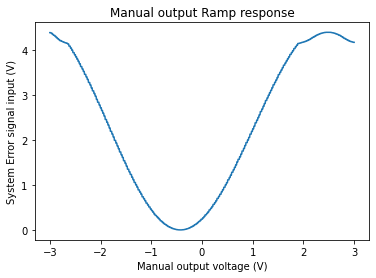

array([4.385934e+00, 4.385934e+00, 4.385934e+00, 4.385934e+00,
       4.374633e+00, 4.374633e+00, 4.374633e+00, 4.374633e+00,
       4.349355e+00, 4.349355e+00, 4.349355e+00, 4.349355e+00,
       4.326803e+00, 4.326803e+00, 4.326803e+00, 4.326803e+00,
       4.326803e+00, 4.302264e+00, 4.302264e+00, 4.302264e+00,
       4.302264e+00, 4.277325e+00, 4.277325e+00, 4.277325e+00,
       4.277325e+00, 4.252699e+00, 4.252699e+00, 4.252699e+00,
       4.252699e+00, 4.230315e+00, 4.230315e+00, 4.230315e+00,
       4.230315e+00, 4.208287e+00, 4.208287e+00, 4.208287e+00,
       4.208287e+00, 4.208287e+00, 4.193906e+00, 4.193906e+00,
       4.193906e+00, 4.193906e+00, 4.181948e+00, 4.181948e+00,
       4.181948e+00, 4.181948e+00, 4.170418e+00, 4.170418e+00,
       4.170418e+00, 4.170418e+00, 4.158859e+00, 4.158859e+00,
       4.158859e+00, 4.158859e+00, 4.158859e+00, 4.149682e+00,
       4.149682e+00, 4.149682e+00, 4.149682e+00, 4.132075e+00,
       4.132075e+00, 4.132075e+00, 4.132075e+00, 4.0858

In [5]:
srs = SRS_SIM900()
srs.connect()
servo2 = SRS_PIDcontrol_SIM960(srs, 3)
servo2.manual_sweep(np.linspace(-3,3,1000))

In [7]:
wsp = Waveshaper()
wsp.connect()

Finisar Waveshaper SN201904 connected


1

In [11]:
wsp.setBandPass(span=5)
wsp.set3rdDisper(d2=2.17, d3= 0., preview_plot=0)
wsp.writeProfile()

Waveshaper Set atten to BandPass [189.675~194.675] THz ([1580.559~1539.964] nm).
Waveshaper Set 3rd disper with d2=2.17 ps/nm, d3=0.0 ps/nm^2, center 192.17465256410256 THz.
Waveshaper profile write successful.


In [13]:
osa = AndoOSA_AQ6315E()
osa.connect()

ANDO AQ-6315E Optical Spectrum Analyzer connected


1

In [15]:
ptamp = PritelAmp()
ptamp.connect()

Pritel Optical Amplifier connected


0

In [26]:
ptamp.preAmp = '600mA'
ptamp.activation=1
ptamp.pwrAmp='0.65A'

Pritel Optical Amplifier: Disable Ramping by self.ramp_pre_ma = 0, now 100 mA.
Pritel Optical Amplifier: Setting PreAmp Current to 000 mA, current Output 0.00 W.
Pritel Optical Amplifier: Setting PreAmp Current to 120 mA, current Output 0.00 W.
Pritel Optical Amplifier: Setting PreAmp Current to 240 mA, current Output 0.00 W.
Pritel Optical Amplifier: Setting PreAmp Current to 360 mA, current Output 0.00 W.
Pritel Optical Amplifier: Setting PreAmp Current to 480 mA, current Output 0.00 W.
Pritel Optical Amplifier: Setting PreAmp Current to 600 mA, current Output 0.00 W.
Pritel Optical Amplifier: ACTIVATING LASER PUMP (OUTPUT), MAKE SURE SEED INPUT POWER IS APPROPRIATE TO AVOID DAMAGE.
Pritel Optical Amplifier: ......waiting Activation status set to ON, now OFF
Pritel Optical Amplifier: ......waiting Activation status set to ON, now ON
Pritel Optical Amplifier: setted Activation status as ON, finished in 1.966 seconds
Pritel Optical Amplifier: Disable Ramping by self.ramp_pwr_ma = 0, no

In [25]:
ptamp.pwramp = 0
ptamp.activation=0

Pritel Optical Amplifier: ......waiting Activation status set to OFF, now ON
Pritel Optical Amplifier: setted Activation status as OFF, finished in 1.219 seconds


In [41]:
ptamp.pwrAmp='0.75A'

Pritel Optical Amplifier: Disable Ramping by self.ramp_pwr_ma = 0, now 50 mA.
Pritel Optical Amplifier: Setting PowerAmp Current to 0.57 A, , current Output 0.12 W.
Pritel Optical Amplifier: Setting PowerAmp Current to 0.63 A, , current Output 0.09 W.
Pritel Optical Amplifier: Setting PowerAmp Current to 0.69 A, , current Output 0.14 W.
Pritel Optical Amplifier: Setting PowerAmp Current to 0.75 A, , current Output 0.21 W.


In [62]:
rio = ORIONLaser()
rio.connect()
rio.printStatus()

ORION Laser Module connected
0
1
0
-----------------------ORION Laser Module Status Summary------------------------
-------------Product ID: RIO0175-5-01-4-AW2, Ver 0.11.7, SN: 806734-------------
|	 Status Code: bytearray(b'\x00\x01\x00\x01\x00\x01')
|	 Photo monitor voltage: 0.905 Volt (also mA, r=1kOhm)
|	 Board Temp:   23.9282 °C
|	 Thermis Temp: 20.6562 °C
|	 Volatile Settings (reset to non-volatile after re-plug): 
|		 Diode Cur = 144.0000 mA, TEC Set = 20.800°C
|	 Non Volatile Settings (Doesn't reset after re-plug): 
|		 Diode Cur = 144.0000 mA, TEC Set = 20.800°C
---------------------ORION Laser Module Status Summary Ends---------------------


"-----------------------ORION Laser Module Status Summary------------------------\n-------------Product ID: RIO0175-5-01-4-AW2, Ver 0.11.7, SN: 806734-------------\n|\t Status Code: bytearray(b'\\x00\\x01\\x00\\x01\\x00\\x01')\n|\t Photo monitor voltage: 0.905 Volt (also mA, r=1kOhm)\n|\t Board Temp:   23.9282 °C\n|\t Thermis Temp: 20.6562 °C\n|\t Volatile Settings (reset to non-volatile after re-plug): \n|\t\t Diode Cur = 144.0000 mA, TEC Set = 20.800°C\n|\t Non Volatile Settings (Doesn't reset after re-plug): \n|\t\t Diode Cur = 144.0000 mA, TEC Set = 20.800°C\n---------------------ORION Laser Module Status Summary Ends---------------------"

In [69]:
int.from_bytes(rio.query(0x1F)['data'], byteorder='big')

10047

In [63]:
rio.writeLaserdiodeCur_mA(150) # 144 to 165
time.sleep(3)
print(amamp.inputPowerCh1)

0.2833267


In [64]:
rio.writeTECsetpoint(20) # 10 to 26.8
time.sleep(5)
print(amamp.inputPowerCh1)
int.from_bytes(rio.query(0x1F)['data'], byteorder='big')

0.276028


12531

In [61]:
rio.printStatus()

0
1
0
-----------------------ORION Laser Module Status Summary------------------------
-------------Product ID: RIO0175-3-22-4-CJ5, Ver 0.11.7, SN: 811177-------------
|	 Status Code: bytearray(b'\x00\x01\x00\x01\x00\x01')
|	 Photo monitor voltage: 0.585 Volt (also mA, r=1kOhm)
|	 Board Temp:   21.9149 °C
|	 Thermis Temp: 22.6047 °C
|	 Volatile Settings (reset to non-volatile after re-plug): 
|		 Diode Cur = 165.0000 mA, TEC Set = 22.859°C
|	 Non Volatile Settings (Doesn't reset after re-plug): 
|		 Diode Cur = 165.0000 mA, TEC Set = 25.902°C
---------------------ORION Laser Module Status Summary Ends---------------------


"-----------------------ORION Laser Module Status Summary------------------------\n-------------Product ID: RIO0175-3-22-4-CJ5, Ver 0.11.7, SN: 811177-------------\n|\t Status Code: bytearray(b'\\x00\\x01\\x00\\x01\\x00\\x01')\n|\t Photo monitor voltage: 0.585 Volt (also mA, r=1kOhm)\n|\t Board Temp:   21.9149 °C\n|\t Thermis Temp: 22.6047 °C\n|\t Volatile Settings (reset to non-volatile after re-plug): \n|\t\t Diode Cur = 165.0000 mA, TEC Set = 22.859°C\n|\t Non Volatile Settings (Doesn't reset after re-plug): \n|\t\t Diode Cur = 165.0000 mA, TEC Set = 25.902°C\n---------------------ORION Laser Module Status Summary Ends---------------------"

Stanford Research System SIM900 connected
SRS PID controller SIM960: PID output is turned OFF, output mode is turnd to Manual.


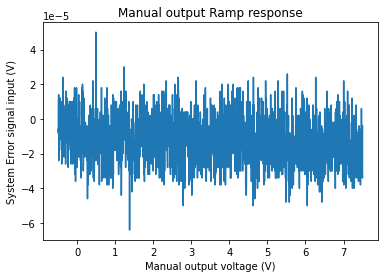

In [57]:
srs = SRS_SIM900()
srs.connect()
servo3 = SRS_PIDcontrol_SIM960(srs, 5)
r = servo3.manual_sweep(np.linspace(-0.5,7.5,8001))

SRS PID controller SIM960: PID output is turned OFF, output mode is turnd to Manual.


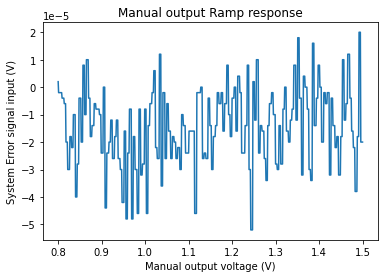

array([ 2.0e-06, -2.0e-06, -2.0e-06, -2.0e-06, -2.0e-06, -2.0e-06,
       -2.0e-06, -2.0e-06, -2.0e-06, -4.0e-06, -4.0e-06, -4.0e-06,
       -4.0e-06, -4.0e-06, -6.0e-06, -6.0e-06, -6.0e-06, -6.0e-06,
       -2.0e-05, -2.0e-05, -2.0e-05, -2.0e-05, -3.0e-05, -3.0e-05,
       -3.0e-05, -3.0e-05, -3.0e-05, -1.8e-05, -1.8e-05, -1.8e-05,
       -1.8e-05, -2.2e-05, -2.2e-05, -2.2e-05, -2.2e-05, -1.0e-05,
       -1.0e-05, -1.0e-05, -1.0e-05, -1.0e-05, -4.0e-05, -4.0e-05,
       -4.0e-05, -4.0e-05, -2.8e-05, -2.8e-05, -2.8e-05, -2.8e-05,
       -4.0e-06, -4.0e-06, -4.0e-06, -4.0e-06, -4.0e-06, -2.0e-05,
       -2.0e-05, -2.0e-05, -2.0e-05,  8.0e-06,  8.0e-06,  8.0e-06,
        8.0e-06, -1.0e-05, -1.0e-05, -1.0e-05, -1.0e-05,  1.0e-05,
        1.0e-05,  1.0e-05,  1.0e-05,  1.0e-05, -4.0e-06, -4.0e-06,
       -4.0e-06, -4.0e-06, -1.8e-05, -1.8e-05, -1.8e-05, -1.8e-05,
       -1.4e-05, -1.4e-05, -1.4e-05, -1.4e-05, -1.4e-05, -6.0e-06,
       -6.0e-06, -6.0e-06, -6.0e-06, -8.0e-06, -8.0e-06, -8.0e

In [58]:
servo3 = SRS_PIDcontrol_SIM960(srs, 5)
servo3.manual_sweep(np.linspace(0.8,1.5,701))

In [56]:
np.linspace(-0.5,7.5,8001)

array([-0.5  , -0.499, -0.498, ...,  7.498,  7.499,  7.5  ])

In [4]:
amamp = AmonicsEDFA(addr='ASRL13::INSTR')
amamp.connect()
amamp.printStatus()

Amonics EDFA connected
-----------------------------------Amonics EDFA----------------------------------
|--------------------------Amonics EDFA Status Summary---------------------------
|------------------Model: AEDFA-PM-23-R-FA, Serial No.22020702-------------------
|	InterLock Status: UNLOCKED
|	Case Temperature: 24.88°C
|	Master Activation: ON
|	------------Channel Summary-------------
|	 CHANNEL1: 
|		 Mode: ACC
|		 Set Cur: 380.0 mA
|		 Status: ON
|		 Input Power: 1.529959 mW
|		 Output Power: 203.2757 mW
|		 Internal PD Power: 251.599 mW
------------------------Amonics EDFA Status Summary Ends------------------------



'-----------------------------------Amonics EDFA----------------------------------\n|--------------------------Amonics EDFA Status Summary---------------------------\n|------------------Model: AEDFA-PM-23-R-FA, Serial No.22020702-------------------\n|\tInterLock Status: \x1bUNLOCKED\x1b\n|\tCase Temperature: 24.88°C\n|\tMaster Activation: \x1bON\x1b\n|\t------------Channel Summary-------------\n|\t CHANNEL1: \n|\t\t Mode: ACC\n|\t\t Set Cur: 380.0 mA\n|\t\t Status: \x1bON\x1b\n|\t\t Input Power: 1.529959 mW\n|\t\t Output Power: 203.2757 mW\n|\t\t Internal PD Power: 251.599 mW\n------------------------Amonics EDFA Status Summary Ends------------------------\n'

In [34]:
from LFC.Hardware.AndoOSA_AQ6315E import AndoOSA_AQ6315E
osa = AndoOSA_AQ6315E()
osa.connect()

ANDO AQ-6315E Optical Spectrum Analyzer connected


1

In [33]:
osa.save_trace('c',r"Z:\Maodong\Projects\Keck\Filter Cavity test\20221121\test.mat")

Z:\Maodong\Projects\Keck\Keck Comb\LFC\Hardware\AndoOSA_AQ6315E.py:273: UserWarning: ANDO AQ-6315E Optical Spectrum Analyzer: Filename extension .mat is ignored. This function save ['.mat', '.txt']. Change extension to save by extensions=['.mat']
  warnings.warn(self.devicename+": Filename extension "+os.path.splitext(single_filename)[-1]+


VisaIOError: VI_ERROR_NLISTENERS (-1073807265): No listeners condition is detected (both NRFD and NDAC are deasserted).

In [44]:
import Ice
Ice.getSliceDir()

'C:\\Users\\HSFLFC\\.conda\\envs\\lfc\\lib\\site-packages\\Ice\\..\\slice'